In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def k(x1,x2):
    return np.exp(-np.abs(x1-x2))

def K(X1,X2):
    res = np.zeros([len(X1),len(X2)])
    for i1,x1 in enumerate(X1):
        for i2,x2 in enumerate(X2):
            res[i1,i2]=k(x1,x2)
    return res

In [17]:
X = np.linspace(0,10,11)[:,None]

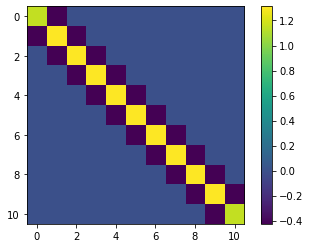

In [18]:
plt.imshow(np.linalg.inv(K(X,X)))
plt.colorbar()

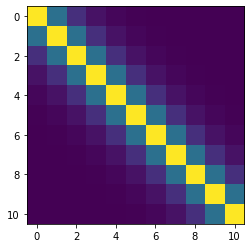

In [19]:
plt.imshow(K(X,X))

In [20]:
def eBL(L,beta=1,s=100):
    return np.linalg.matrix_power(np.eye(L.shape[0])+beta*L/s,s)

In [21]:
def neweBL(L,beta=1):
    lam,v = np.linalg.eig(L)
    return v@np.exp(beta*lam)@v.T
#neweBL(L)

In [22]:
def connect(L,N,starti,startj,endi,endj):
    L[starti+startj*N,endi+endj*N]+=1
    L[endi+endj*N,starti+startj*N]+=1
    L[endi+endj*N,endi+endj*N]-=1
    L[starti+startj*N,starti+startj*N]-=1
    

In [23]:
N = 50
L = np.zeros([N*N,N*N])
for i in range(0,N):
    for j in range(0,N):
        connect(L,N,i,j,i-1,j)
        connect(L,N,i,j,i,j-1)

In [24]:
for it in range(10):
    connect(L,N,1,2,3,4)
    connect(L,N,3,4,5,6)
    connect(L,N,5,6,6,4)
    connect(L,N,6,4,8,3)
    connect(L,N,8,3,8,5)
    connect(L,N,8,5,8,7)
    connect(L,N,8,7,8,9)
    connect(L,N,8,9,5,9)
    connect(L,N,3,9,3,6)
    connect(L,N,3,6,1,2)

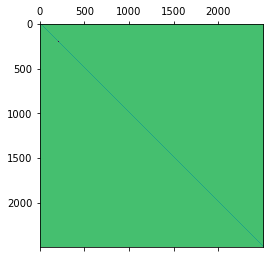

In [25]:
plt.matshow(L)

In [26]:
#too slow.
#K = eBL(L,beta=5,s=10)

In [27]:
#too slow.
#plt.plot(sorted(np.linalg.eigvals(-L),reverse=True))

======

In [30]:
from scipy.sparse.linalg.eigen.arpack import eigsh
from scipy.linalg import eig
lamfull,vfull = eig(L)
lam,v = eigsh(L,k=40,which='LA')

In [31]:
beta = 5.0
s = np.zeros([len(L),len(L)])
#for vi,lami in zip(v.T[order],lam[order]):
for vi,lami in zip(v.T,lam):
    s = s + vi[:,None]@vi[None,:]*np.exp(lami*beta)

In [32]:
sfull = np.zeros([len(L),len(L)])
#for vi,lami in zip(v.T[order],lam[order]):
for vi,lami in zip(vfull.T,lamfull):
    sfull = sfull + vi[:,None]@vi[None,:]*np.exp(lami*beta)

In [33]:
lam

array([-2.02749896e-01, -2.00273664e-01, -1.99712065e-01, -1.68237440e-01,
       -1.63470242e-01, -1.61620904e-01, -1.58609701e-01, -1.56935168e-01,
       -1.55977856e-01, -1.55536906e-01, -1.54682802e-01, -1.44030082e-01,
       -1.42926730e-01, -1.41750736e-01, -1.40937779e-01, -1.30471521e-01,
       -1.29750042e-01, -1.25329547e-01, -1.24092041e-01, -8.55508789e-02,
       -8.22841154e-02, -8.13806946e-02, -7.99467043e-02, -7.93633485e-02,
       -7.80227720e-02, -7.76586489e-02, -7.74176653e-02, -6.49545019e-02,
       -6.42549853e-02, -6.31872016e-02, -6.29562602e-02, -3.34626760e-02,
       -3.23925085e-02, -3.18616447e-02, -3.10042892e-02, -1.65262306e-02,
       -1.62496512e-02, -1.58013724e-02, -1.57806117e-02,  4.74071742e-15])

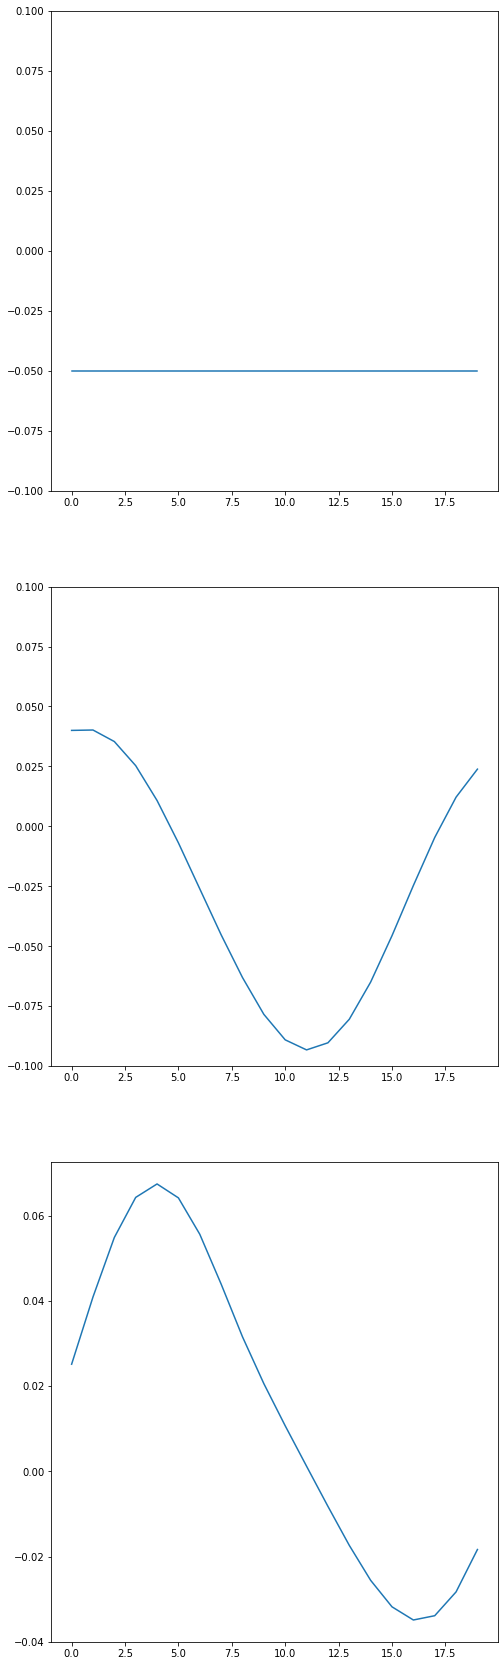

In [180]:
plt.figure(figsize=[8,30])
for i in range(3):
    plt.ylim([-0.1,0.1])
    plt.subplot(3,1,i+1)
    plt.plot(v[0:20,-(i*3+1)])

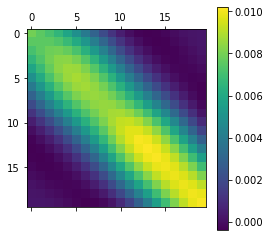

In [34]:
plt.matshow(np.real(s)[:20,:20]) #2500/400 = 
plt.colorbar()

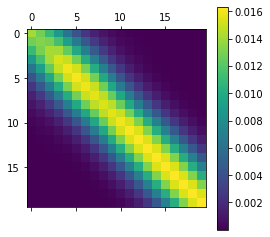

In [35]:
plt.matshow(np.real(sfull)[:20,:20])
plt.colorbar()

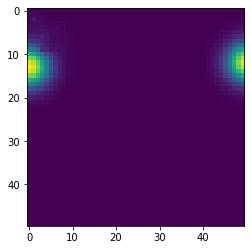

In [36]:
teststart = np.zeros([N**2,1])
teststart[int(N/2+(N/2)**2)]=1
plt.imshow(np.real(sfull @ teststart).reshape(N,N))

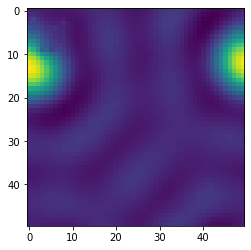

In [37]:
teststart = np.zeros([N**2,1])
teststart[int(N/2+(N/2)**2)]=1
plt.imshow(np.real(s @ teststart).reshape(N,N))

======

In [24]:
#from scipy.linalg import eigh as eigh
from scipy.sparse.linalg.eigen.arpack import eigsh
#from scipy.sparse.linalg import eigs
from scipy.linalg import eig
lam,v = eig(L)
#import time
#st=time.time()
##lam,v = eigh(L,eigvals=(len(L)-k,len(L)-1))
lam,v = eigsh(L,k=10,which='LA')
#print(time.time()-st)

0.0038406848907470703


/home/mike/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


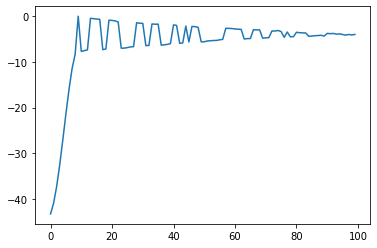

In [18]:
np.set_printoptions(precision=2,suppress=True)
import time
st=time.time()
#too slow
#lam,v=np.linalg.eig(-L)
eBL(L,beta=5)
print(time.time()-st)
plt.plot(lam)

In [25]:
beta = 5.0
s = np.zeros([len(L),len(L)])
#for vi,lami in zip(v.T[order],lam[order]):
for vi,lami in zip(v.T,lam):
    s = s + vi[:,None]@vi[None,:]*np.exp(lami*beta)

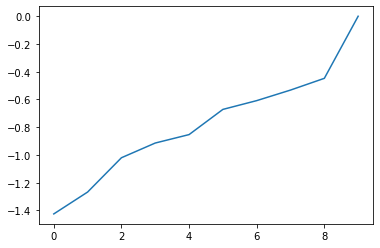

In [26]:
plt.plot(lam)

In [27]:
K = np.real(s)

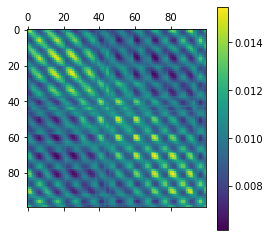

In [28]:
plt.matshow(np.real(s))
plt.colorbar()

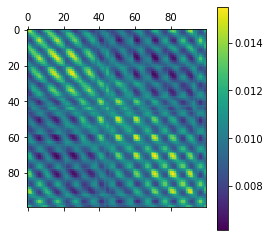

In [23]:
plt.matshow(eBL(L,beta=5,s=5000))
plt.colorbar()

In [144]:
N = 10
L = np.zeros([N*N,N*N])
for it in range(10):
    connect(L,N,1,2,3,4)
    connect(L,N,3,4,5,6)
    connect(L,N,5,6,6,4)
    connect(L,N,6,4,8,3)
    connect(L,N,8,3,8,5)
    connect(L,N,8,5,8,7)
    connect(L,N,8,7,8,9)
    connect(L,N,8,9,5,9)
    connect(L,N,3,9,3,6)
    connect(L,N,3,6,1,2)

In [147]:
newK = eBL(L,beta=5,s=5000)

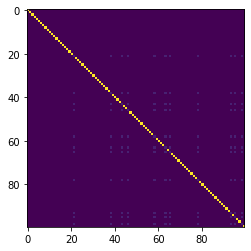

In [148]:
plt.imshow(newK)

<Figure size 432x288 with 0 Axes>

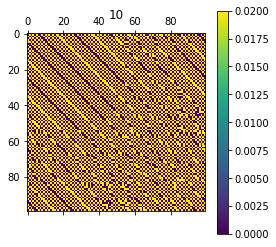

<Figure size 432x288 with 0 Axes>

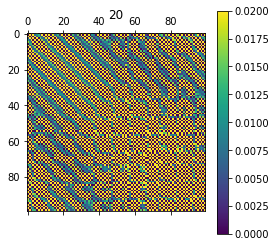

<Figure size 432x288 with 0 Axes>

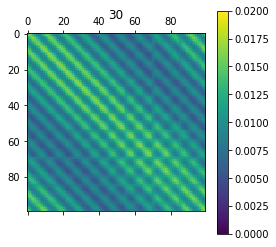

<Figure size 432x288 with 0 Axes>

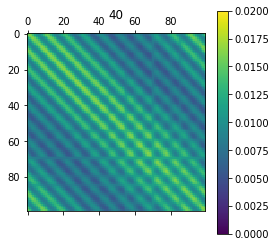

<Figure size 432x288 with 0 Axes>

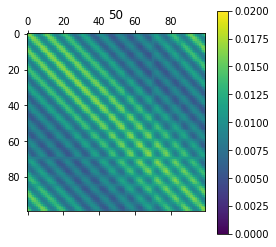

<Figure size 432x288 with 0 Axes>

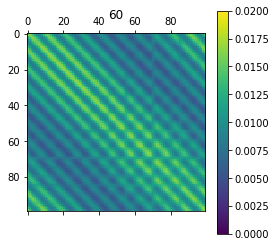

<Figure size 432x288 with 0 Axes>

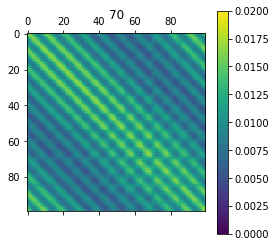

<Figure size 432x288 with 0 Axes>

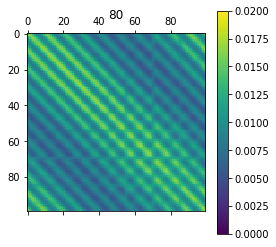

<Figure size 432x288 with 0 Axes>

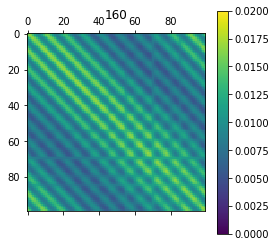

In [19]:
for s in [10,20,30,40,50,60,70,80,160]:
    plt.figure()
    plt.matshow(eBL(L,beta=5,s=s))
    plt.clim([0,0.02])
    plt.colorbar()
    plt.title(s)

In [96]:
neweBL(L,beta=5)

array([ 0.02,  0.01, -0.1 , -0.07, -0.12,  0.06, -0.02,  0.05,  0.07,
        0.07, -0.02,  0.2 ,  0.08, -0.06,  0.06,  0.15, -0.06,  0.01,
        0.1 ,  0.19,  0.25,  0.02, -0.05,  0.1 ,  0.11, -0.13, -0.01,
       -0.06, -0.06,  0.06,  0.17,  0.07, -0.22,  0.03,  0.03, -0.06,
       -0.01,  0.02, -0.07,  0.04,  0.03,  0.03,  0.11, -0.27, -0.  ,
        0.25,  0.17,  0.18, -0.01, -0.19,  0.07,  0.06, -0.13,  0.04,
        0.12, -0.13,  0.18, -0.03,  0.17, -0.02, -0.06,  0.14,  0.06,
        0.06,  0.07, -0.1 ,  0.09, -0.01,  0.01, -0.07, -0.23,  0.2 ,
       -0.07, -0.07, -0.14, -0.01,  0.09,  0.  ,  0.07,  0.06, -0.06,
       -0.09, -0.09,  0.07, -0.09,  0.01, -0.04,  0.11,  0.  , -0.05,
        0.03,  0.02, -0.03, -0.16, -0.1 , -0.03, -0.02, -0.17,  0.04,
        0.01])

In [67]:
predY = np.reshape(K[:,135:136]@np.linalg.inv(K[135:136,135:136])@np.array([[5]]),[N,N])

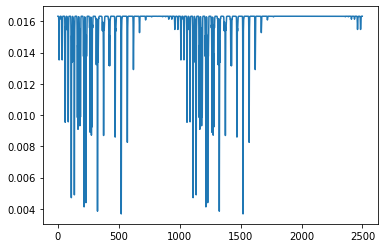

In [68]:
plt.plot(np.diag(K))

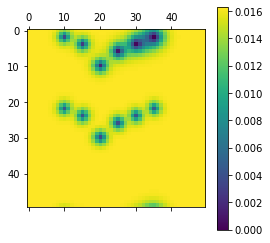

In [74]:
varY = np.reshape(np.diag(K)-np.diag((K[:,135:136]@np.linalg.inv(K[135:136,135:136])@K[135:136,:])),[N,N])
plt.matshow(varY)
plt.colorbar()

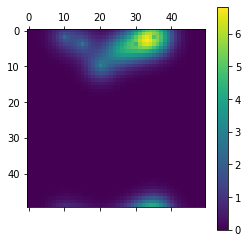

In [70]:
plt.matshow(predY)
plt.colorbar()